# Logistic regression - homework

In [112]:
import pandas as pd

### 1) Load the data

In [53]:
df = pd.read_csv("adult_small.csv")
df.head()

,age,education.num,race,sex,hours.per.week,income
0,51,13,White,Female,40,>50K
1,18,6,White,Male,40,<=50K
2,50,9,White,Male,40,<=50K
3,32,9,Black,Female,40,<=50K
4,35,9,White,Male,48,<=50K


In [54]:
df.shape

(4922, 6)

In [55]:
df.isnull().sum()

age               0
education.num     0
race              0
sex               0
hours.per.week    0
income            0
dtype: int64

In [56]:
df.duplicated().sum()

1620

In this dataset there is a high probability of duplicates

In [57]:
print(df["race"].unique())
print(df["sex"].unique())
print(df["income"].unique())

['White' 'Black' 'Asian-Pac-Islander']
['Female' 'Male']
['>50K' '<=50K']


In [58]:
df.race.replace({"White": 0, "Black": 1, "Asian-Pac-Islander": 2}, inplace = True)
df.sex.replace({"Female": 0, "Male": 1}, inplace = True)
df.income.replace({">50K": 0, "<=50K": 1}, inplace = True)
df.head()

,age,education.num,race,sex,hours.per.week,income
0,51,13,0,0,40,0
1,18,6,0,1,40,1
2,50,9,0,1,40,1
3,32,9,1,0,40,1
4,35,9,0,1,48,1


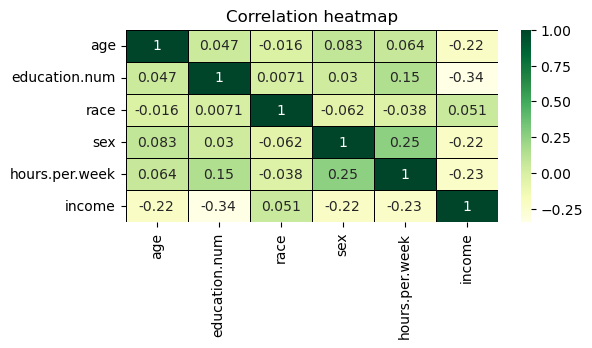

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6, 2.5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', linewidths=0.6, linecolor='black')
plt.title('Correlation heatmap')
plt.show()

In [60]:
df.corr(numeric_only=True)['income']

age              -0.222265
education.num    -0.344714
race              0.051065
sex              -0.218966
hours.per.week   -0.233490
income            1.000000
Name: income, dtype: float64

### 2) Set up train and test 

In [61]:
y = df.income
X = df.drop(columns=['income'])
X.shape, y.shape

((4922, 5), (4922,))

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3937, 5), (985, 5), (3937,), (985,))

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# why do we do this part?

### 3) Model Construction

In [70]:
from sklearn.linear_model import LogisticRegression  

logreg = LogisticRegression(random_state=42)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [72]:
logreg.coef_

array([[-0.56421093, -0.92905975,  0.08664589, -0.51763697, -0.44609505]])

In [73]:
logreg.intercept_

array([1.57672155])

### 4) Model evaluation

In [78]:
y_test_pred = logreg.predict(X_test)
# y_test_pred

In [81]:
y_test_pred_probs = logreg.predict_proba(X_test)
# y_test_pred_probs

In [99]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       272
           1       0.79      0.94      0.86       713

    accuracy                           0.78       985
   macro avg       0.74      0.65      0.66       985
weighted avg       0.76      0.78      0.75       985



0 ... income > 50K
1 ... income <= 50K

Precision: 69 % of correct positive predictions of income 0 relative to total positive predictions.<br>
Recall: 35 % correct positive predictions relative to total actual positives.<br>
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.<br>
Support: 272 people had income > 50K, 713 of them had income <= 50K<br>

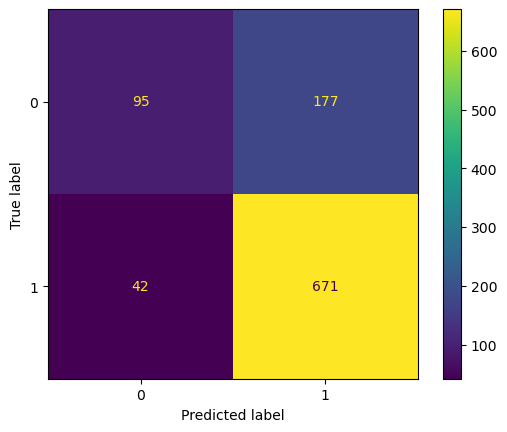

In [110]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

Accuracy: $$\frac{95 + 671}{95 + 177 + 42 + 671}\, = 78 \%$$<br>
Precision (of 1):  $$\frac{671}{671 + 177}\, = 79 \%$$<br>
Recall: $$\frac{671}{42 + 671}\, = 94 \%$$<br>